<a href="https://colab.research.google.com/github/iramvai007/ClassifyingFiveBangladeshiCrops/blob/main/Crops_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classifying Crops by Inception V3, VGG16 and own model using Keras

In [ ]:
from google.colab import drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import  libraries 

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [ ]:
# re-size 
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/CSE438/kag2'
valid_path = '/content/drive/MyDrive/Colab Notebooks/CSE438/crop_images'


USING Inception V3

In [ ]:
# Import the InceptionV3 library 
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# don't train existing weights
#for layer in inception.layers:
#    layer.trainable = True

In [ ]:
  #output classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/CSE438/kag2')

In [ ]:
# our layers 
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(5, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [ ]:
# telling the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
#Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# providing the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CSE438/kag2',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 804 images belonging to 5 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CSE438/crop_images',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 136 images belonging to 5 classes.


In [ ]:
# fit the model

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
51/51 [==============================] - 23s 352ms/step - loss: 3.9985 - accuracy: 0.5734 - val_loss: 0.9744 - val_accuracy: 0.8162
Epoch 2/10
51/51 [==============================] - 14s 280ms/step - loss: 0.7849 - accuracy: 0.8557 - val_loss: 0.1852 - val_accuracy: 0.9338
Epoch 3/10
51/51 [==============================] - 14s 280ms/step - loss: 0.4973 - accuracy: 0.9005 - val_loss: 0.1023 - val_accuracy: 0.9779
Epoch 4/10
51/51 [==============================] - 14s 281ms/step - loss: 0.2689 - accuracy: 0.9440 - val_loss: 0.0179 - val_accuracy: 0.9926
Epoch 5/10
51/51 [==============================] - 14s 278ms/step - loss: 0.2548 - accuracy: 0.9502 - val_loss: 0.1092 - val_accuracy: 0.9632
Epoch 6/10
51/51 [==============================] - 14s 283ms/step - loss: 0.1226 - accuracy: 0.9652 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 7/10
51/51 [==============================] - 14s 280ms/step - loss: 0.2721 - accuracy: 0.9515 - val_loss: 0.0274 - val_accuracy: 0.9853

USING VGG16


In [ ]:
import tensorflow as tf
import os
import numpy as np

In [ ]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential 
from glob import glob

In [ ]:
Image_size=[224,224]
vgg=VGG16(input_shape=Image_size+[3],weights='imagenet',include_top=False)
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
for layer in vgg.layers:
    layer.trainable=False

In [ ]:
  #output classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/CSE438/kag2')

In [ ]:
x=Flatten()(vgg.output)
prediction=Dense(5,activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# fit the model

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
51/51 [==============================] - 135s 3s/step - loss: 1.1586 - accuracy: 0.5734 - val_loss: 0.4224 - val_accuracy: 0.8750
Epoch 2/10
51/51 [==============================] - 15s 294ms/step - loss: 0.4084 - accuracy: 0.8818 - val_loss: 0.2486 - val_accuracy: 0.9265
Epoch 3/10
51/51 [==============================] - 15s 294ms/step - loss: 0.2403 - accuracy: 0.9403 - val_loss: 0.1220 - val_accuracy: 1.0000
Epoch 4/10
51/51 [==============================] - 15s 292ms/step - loss: 0.1630 - accuracy: 0.9826 - val_loss: 0.1077 - val_accuracy: 1.0000
Epoch 5/10
51/51 [==============================] - 15s 291ms/step - loss: 0.1271 - accuracy: 0.9801 - val_loss: 0.0654 - val_accuracy: 1.0000
Epoch 6/10
51/51 [==============================] - 15s 293ms/step - loss: 0.0827 - accuracy: 0.9938 - val_loss: 0.0368 - val_accuracy: 1.0000
Epoch 7/10
51/51 [==============================] - 15s 294ms/step - loss: 0.0731 - accuracy: 0.9938 - val_loss: 0.0330 - val_accuracy: 1.0000
E

Using OWN model

In [ ]:
# I have used 3 Convolutional layers followed by max-pooling layers, a drop layer and 2 dense layer
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())


model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())


model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(5, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_95 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_96 (Conv2D)          (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# fit the model

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
51/51 [==============================] - 176s 3s/step - loss: 1.5938 - accuracy: 0.3209 - val_loss: 1.1727 - val_accuracy: 0.5147
Epoch 2/10
51/51 [==============================] - 12s 243ms/step - loss: 1.1815 - accuracy: 0.5100 - val_loss: 1.1833 - val_accuracy: 0.5147
Epoch 3/10
51/51 [==============================] - 12s 241ms/step - loss: 1.0890 - accuracy: 0.5448 - val_loss: 0.8523 - val_accuracy: 0.6618
Epoch 4/10
51/51 [==============================] - 13s 246ms/step - loss: 0.8611 - accuracy: 0.6443 - val_loss: 0.5563 - val_accuracy: 0.8015
Epoch 5/10
51/51 [==============================] - 12s 240ms/step - loss: 0.6819 - accuracy: 0.7475 - val_loss: 0.3058 - val_accuracy: 0.9044
Epoch 6/10
51/51 [==============================] - 12s 242ms/step - loss: 0.5272 - accuracy: 0.8047 - val_loss: 0.3518 - val_accuracy: 0.8897
Epoch 7/10
51/51 [==============================] - 12s 243ms/step - loss: 0.4921 - accuracy: 0.8371 - val_loss: 0.2385 - val_accuracy: 0.8971
E

Graph for Own Model

In [ ]:
import matplotlib.pyplot as plt

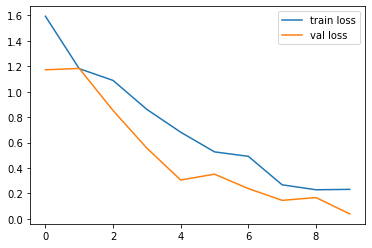

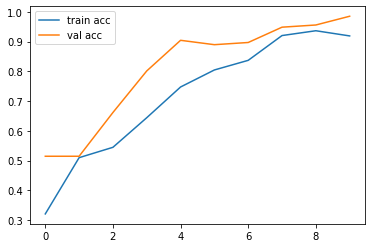

<Figure size 432x288 with 0 Axes>

In [ ]:
# plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plotting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import matplotlib.pyplot as plt

Graph for Inception v3

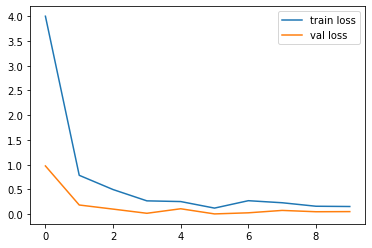

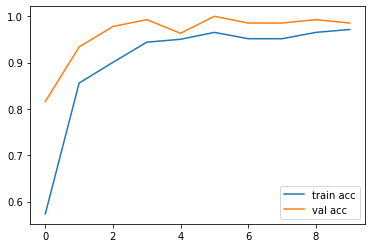

<Figure size 432x288 with 0 Axes>

In [ ]:
# plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plotting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

Graph for vgg16

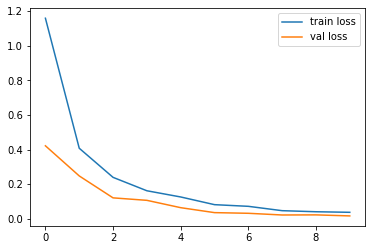

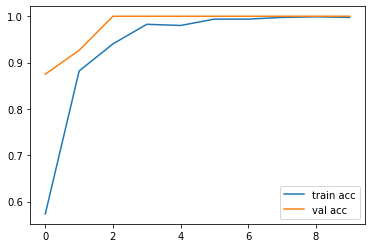

<Figure size 432x288 with 0 Axes>

In [ ]:
# plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plotting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
#Testing the model
from google.colab import files
uploaded = files.upload()

Saving paddy.jpg to paddy (1).jpg


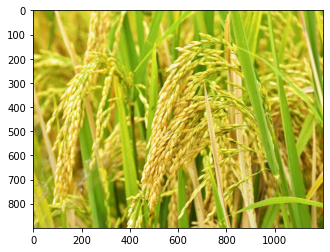

In [ ]:
#Showing image
uploaded_img = plt.imread('paddy.jpg')
img = plt.imshow(uploaded_img)

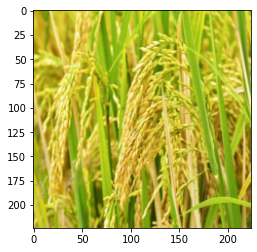

In [ ]:
#Resizing image
from skimage.transform import resize
resized_img = resize(uploaded_img, (224, 224, 3))
img= plt.imshow(resized_img)

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[9.98421669e-01, 3.77339724e-08, 3.07994448e-08, 1.57832296e-03,
        4.81382729e-12],
       [9.99899030e-01, 6.22694552e-06, 8.73065146e-05, 7.50023582e-06,
        1.90110132e-11],
       [5.23931696e-04, 9.51412786e-03, 9.07798588e-01, 2.14928156e-03,
        8.00140426e-02],
       [2.65668980e-08, 6.79209130e-04, 1.06226476e-02, 1.64345101e-06,
        9.88696456e-01],
       [1.34114095e-03, 2.70044493e-05, 4.86682750e-10, 9.98631775e-01,
        2.85490164e-13],
       [3.10342152e-08, 1.61225653e-05, 9.96276259e-01, 2.28587464e-06,
        3.70532158e-03],
       [6.08613947e-04, 1.49898381e-06, 4.72286530e-07, 9.99389410e-01,
        1.09809106e-09],
       [4.13889502e-05, 1.17070517e-02, 6.75528822e-03, 6.55426236e-04,
        9.80840862e-01],
       [1.12208021e-07, 6.12687087e-04, 1.31397879e-10, 9.99387145e-01,
        5.87042970e-10],
       [5.78422041e-05, 2.45297524e-05, 9.99917626e-01, 1.64479630e-09,
        1.46537815e-09],
       [7.40272155e-09, 5.4213

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 2, 4, 3, 2, 3, 4, 3, 2, 4, 2, 4, 1, 1, 2, 1, 4, 4, 1, 1, 4,
       2, 0, 4, 4, 4, 0, 1, 4, 4, 3, 0, 4, 4, 1, 4, 4, 1, 1, 3, 1, 3, 1,
       4, 1, 1, 0, 3, 4, 4, 2, 2, 1, 4, 1, 4, 2, 1, 3, 0, 1, 3, 4, 3, 1,
       2, 4, 0, 1, 4, 0, 2, 2, 4, 3, 2, 3, 4, 0, 4, 4, 1, 1, 4, 3, 3, 3,
       0, 3, 0, 2, 1, 1, 4, 4, 3, 0, 0, 0, 3, 0, 2, 1, 3, 0, 4, 2, 0, 0,
       2, 3, 1, 0, 3, 0, 2, 4, 4, 3, 4, 3, 1, 4, 3, 4, 0, 4, 3, 4, 1, 4,
       3, 1, 1, 1])

In [ ]:
x=image.img_to_array(resized_img)
x

array([[[0.7382991 , 0.62849516, 0.06771083],
        [0.7648109 , 0.655007  , 0.09422269],
        [0.7709734 , 0.6720938 , 0.10566851],
        ...,
        [0.75220215, 0.7904762 , 0.1939776 ],
        [0.59619975, 0.7016269 , 0.10633753],
        [0.45847338, 0.6217787 , 0.03869048]],

       [[0.72449356, 0.61468965, 0.05390531],
        [0.75689775, 0.64709383, 0.08630952],
        [0.77254903, 0.67016804, 0.10546219],
        ...,
        [0.7603291 , 0.7809874 , 0.18655463],
        [0.6315614 , 0.7161064 , 0.12601541],
        [0.5017507 , 0.64697254, 0.06658038]],

       [[0.7283263 , 0.6185224 , 0.0577381 ],
        [0.75112045, 0.64131653, 0.08053222],
        [0.774456  , 0.6662465 , 0.10546219],
        ...,
        [0.77864146, 0.7747899 , 0.18305323],
        [0.65510076, 0.7082633 , 0.12969188],
        [0.5389393 , 0.65238094, 0.08196779]],

       ...,

       [[0.79356116, 0.74688375, 0.21102941],
        [0.74334735, 0.71506727, 0.267542  ],
        [0.69793415, 0

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.0000000e+00, 1.5049295e-35, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([False])

In [ ]:
#get image classification
index=5
classification = ['jute', 'maize', 'rice', 'sugarcane', 'wheat']
#print('Image class: ', classification[y_pred[index][0]])

In [ ]:
index = 5
y_pred[index]

2

In [ ]:
#Getting the models prediction
pred = model.predict(np.array([resized_img]))

#Showing predictions
pred

array([[3.1495782e-07, 4.9899601e-05, 9.9994946e-01, 1.1126876e-07,
        2.4631566e-07]], dtype=float32)

In [ ]:
#Sorting predictions
list_index = [0,1,2,3,4]
x = pred

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
  
#showing sorted label in order
print(list_index)

[2, 1, 0, 3, 4]


Inception v3

In [ ]:
#the classifications
for i in range(5):
  print(classification[list_index[i]], ':', pred[0][list_index[i]]*100, '%')

rice : 99.99998807907104 %
sugarcane : 2.0082941976085067e-07 %
maize : 2.1146484563416834e-08 %
jute : 2.3897299181854948e-15 %
wheat : 1.1162810409359736e-05 %


classification for vgg16

In [ ]:
#the classifications
for i in range(5):
  print(classification[list_index[i]], ':', pred[0][list_index[i]]*100, '%')

rice : 94.70123648643494 %
maize : 2.609195187687874 %
sugarcane : 2.359137497842312 %
jute : 0.32791635021567345 %
wheat : 0.002513684557925444 %


Classification for Own Model

In [ ]:
#the classifications
for i in range(5):
  print(classification[list_index[i]], ':', pred[0][list_index[i]]*100, '%')

rice : 99.99494552612305 %
maize : 0.004989960143575445 %
jute : 3.1495781627199904e-05 %
sugarcane : 1.112687613158414e-05 %
wheat : 2.4631566475363798e-05 %
